In [1]:
import os 
import re
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [32]:
import numpy as np

import pandas as pd
from matplotlib import pyplot as plt

import astroquery
from astroquery.sdss import SDSS
from astropy.table import Table
from astropy.io import fits

from specutils import Spectrum1D

import sys
from urllib.error import HTTPError

from src.astroML.dimensionality.iterative_pca import iterative_pca
from src.astroML.datasets.sdss_spectrum import fetch_sdss_spectrum
from astroML.datasets import sdss_corrected_spectra 

In [9]:
nonbal_qso_samp_path = '../data/nonbal_qso_samp.csv'
nonbal_qso_samp_df = pd.read_csv(nonbal_qso_samp_path, index_col=0)

In [22]:
nonbal_qso_samp_df.iloc[0:5]

,SDSS_NAME,RA,DEC,PLATE,MJD,FIBERID,AUTOCLASS_PQN,Z,BAL_PROB,BI_CIV,AI_CIV
0,111438.82+360548.1,168.661785,36.096720,4622,55629,228,QSO,2.468,0.0,0.0,0.0
1,152538.86+100329.5,231.411935,10.058197,5493,56009,344,QSO,2.241,0.0,0.0,0.0
2,012017.97+214854.4,20.074892,21.815122,5134,55868,866,QSO,2.774,0.0,0.0,0.0
3,232436.84+175513.8,351.153518,17.920526,6131,56211,476,QSO,2.275,0.0,0.0,0.0
4,103619.33+105232.4,159.080553,10.875686,5346,55955,784,QSO,3.092,0.0,0.0,0.0


In [64]:
spec = fetch_sdss_spectrum(nonbal_qso_samp_df.iloc[[1]].PLATE.values[0],
                           nonbal_qso_samp_df.iloc[[1]].MJD.values[0],
                           nonbal_qso_samp_df.iloc[[1]].FIBERID.values[0],
                           nonbal_qso_samp_df.iloc[[1]].Z.values[0],
                           nonbal_qso_samp_df.iloc[[1]].AUTOCLASS_PQN.values[0])

/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5493/spec-5493-56009-0344.fits
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5493/spec-5493-56009-0344.fits


/Users/dangause/Desktop/personal_projects/qso_cv/src/astroML/datasets/tools/sdss_fits.py:112: RuntimeWarning: divide by zero encountered in divide
  self.error = np.sqrt(np.abs(1/data['ivar']))


In [65]:
spec.hdulist.info()

Filename: /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5493/spec-5493-56009-0344.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     124   ()      
  1                1 BinTableHDU     33   4630R x 8C   ['E', 'E', 'E', 'J', 'J', 'E', 'E', 'E']   
  2                1 BinTableHDU    501   1R x 236C   [4A, 6A, 4A, E, E, J, J, E, J, E, E, E, K, K, K, K, K, K, K, K, K, B, B, J, I, 5E, 5E, J, J, J, J, 7A, 7A, 3A, D, D, 3A, 9A, E, E, E, J, E, 21A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, 5E, E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, A, A, A, E, E, E, E, E, E, E, E, J, E, E, J, J, 4A, 15A, E, 35E, 19A, 19A, 19A, B, B, B, I, 3A, B, I, I, I, I, J, E, J, J, E, E, E, E, E, E, E, E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5J, 5J, 5J, 5E, 5J, 75E, 75E, 5E, 5E, 5E, 5J, 5E, D, D, D, D, D, D, D,

In [66]:
spec.hdulist[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T /                                                
TELESCOP= 'SDSS 2.5-M'         / Sloan Digital Sky Survey                       
FLAVOR  = 'science '           / exposure type, SDSS spectro style              
BOSSVER = '2       '           / ICC version                                    
MJD     =                56009 / APO fMJD day at start of exposure              
MJDLIST = '56009   '           /                                                
NAME    = '5493-56009-01'      / The name of the currently loaded plate         
PLATEID =                 5493 / The currently loaded plate                     
TILEID  =                14129 /Cartridge used in this plugging                 
CARTID  =                   

In [67]:
data = spec.hdulist[1].data

data

FITS_rec([(6.519832  , 3.5518, 0.13337733, 0,        0, 1.195867  ,  5.19343  , 5.4041924),
          (4.486263  , 3.5519, 0.        , 0,        0, 1.1956854 ,  5.1369214, 5.531781 ),
          (2.453147  , 3.552 , 0.16424245, 0,        0, 1.1955024 ,  4.9730062, 5.484164 ),
          ...,
          (2.010211  , 4.0145, 0.11633684, 0,        0, 0.9028505 ,  7.1947784, 2.7729666),
          (9.27724   , 4.0146, 0.10919363, 0,        0, 0.9031541 ,  9.141996 , 2.8688931),
          (0.18343383, 4.0147, 0.06411343, 0, 67108864, 0.90345865, 15.842593 , 2.7272203)],
         dtype=(numpy.record, [('FLUX', '>f4'), ('LOGLAM', '>f4'), ('IVAR', '>f4'), ('AND_MASK', '>i4'), ('OR_MASK', '>i4'), ('WDISP', '>f4'), ('SKY', '>f4'), ('MODEL', '>f4')]))

In [68]:
from astropy import units as u
lamb = 10**data['loglam'] * u.AA 
flux = data['flux'] * 10**-17 * u.Unit('erg cm-2 s-1 AA-1')

spec1D = Spectrum1D(spectral_axis=lamb, flux=flux, redshift=spec.z) 



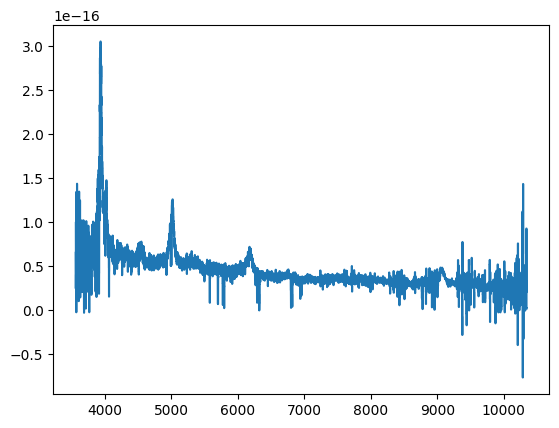

In [69]:
f, ax = plt.subplots()  
ax.step(spec1D.spectral_axis, spec1D.flux) 

In [70]:
spec1D.shift_spectrum_to(redshift=0)

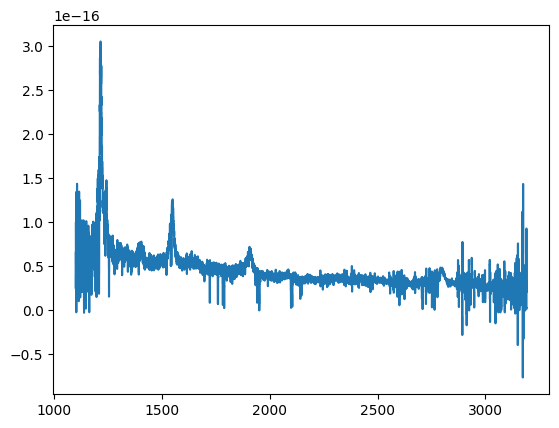

In [71]:
f, ax = plt.subplots()  
ax.step(spec1D.spectral_axis, spec1D.flux) 

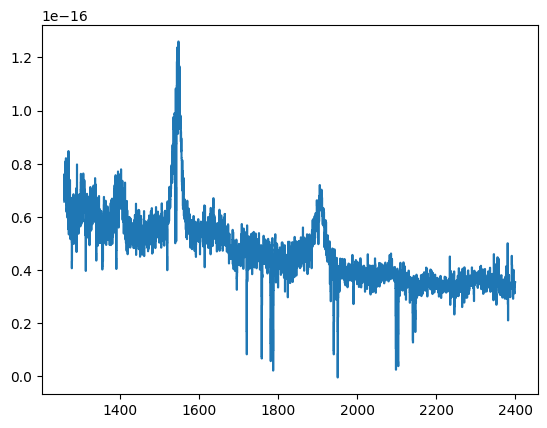

In [72]:
cut_spec1D = spec1D[1260*u.AA:2400*u.AA]

f, ax = plt.subplots()  
ax.step(cut_spec1D.spectral_axis, cut_spec1D.flux) 

In [ ]:
spec.hdulist[1].data

In [11]:
def fetch_and_shift_spectra(df,
                            outfile,
                            loglam_start=3.5,
                            loglam_end=3.9,
                            Nlam=1000):
    """
    This function queries CAS for matching spectra, and then downloads
    them and shifts them to a common redshift binning
    """

    loglam_start=loglam_start
    loglam_end=loglam_end
    Nlam=Nlam
    n_spectra=len(df)

    plate = df.PLATE
    mjd = df.MJD
    fiber = df.FIBERID
    z = df.Z
    sdss_class = df.AUTOCLASS_PQN

    z = np.zeros(n_spectra, dtype=np.float32)
    # zerr = np.zeros(n_spectra, dtype=np.float32)
    spectra = np.zeros((n_spectra, Nlam), dtype=np.float32)
    mask = np.zeros((n_spectra, Nlam), dtype=bool)

    # Calculate new wavelength coefficients
    new_coeff0 = loglam_start
    new_coeff1 = (loglam_end - loglam_start) / Nlam

    # Now download all the needed spectra, and resample to a common
    #  wavelength bin.
    # n_spectra = len(plate)
    num_skipped = 0
    i = 0

    while i < n_spectra:
        sys.stdout.write(' %i / %i spectra\r' % (i + 1, n_spectra))
        sys.stdout.flush()
        try:
            spec = fetch_sdss_spectrum(plate[i], mjd[i], fiber[i], z[i], sdss_class[i])
        except HTTPError:
            num_skipped += 1
            print("%i, %i, %i not found" % (plate[i], mjd[i], fiber[i]))
            i += 1
            continue

        spec_rebin = spec.restframe().rebin(new_coeff0, new_coeff1, Nlam)

        if np.all(spec_rebin.spectrum == 0):
            num_skipped += 1
            print("%i, %i, %i is all zero" % (plate[i], mjd[i], fiber[i], ))
            i += 1
            continue

        z[i] = spec.z

        spectra[i] = spec_rebin.spectrum
        mask[i] = spec_rebin.compute_mask(0.5, 5)

        i += 1
    sys.stdout.write('\n')

    N = i
    print("   %i spectra skipped" % num_skipped)
    print("   %i spectra processed" % N)
    print("saving to %s" % outfile)

    np.savez(outfile,
                spectra=spectra[:N],
                mask=mask[:N],
                coeff0=new_coeff0,
                coeff1=new_coeff1,
                # spec_cln=spec_cln[:N],
                # lineindex_cln=lineindex_cln[:N],
                # log_NII_Ha=log_NII_Ha[:N],
                # log_OIII_Hb=log_OIII_Hb[:N],
                z=z[:N],
                # zerr=zerr[:N]
                )



In [12]:
def spec_iterative_pca(outfile, n_ev=10, n_iter=20, norm='L2'):
    """
    This function takes the file outputted above, performs an iterative
    PCA to fill in the gaps, and appends the results to the same file.
    """
    data_in = np.load(outfile)
    spectra = data_in['spectra']
    mask = data_in['mask']
    mask = np.full((mask.shape[0], mask.shape[1]), False)

    res = iterative_pca(spectra, mask,
                        n_ev=n_ev, n_iter=n_iter, norm=norm,
                        full_output=True)

    input_dict = {key: data_in[key] for key in data_in.files}

    # don't save the reconstructed spectrum: this can easily
    # be recomputed from the other parameters.
    input_dict['mu'] = res[1]
    input_dict['evecs'] = res[2]
    input_dict['evals'] = res[3]
    input_dict['norms'] = res[4]
    input_dict['coeffs'] = res[5]

    np.savez(outfile, **input_dict)

In [14]:
test_df = nonbal_qso_samp_df.iloc[0:100]


outfile_path = '../data/astroML_data/pre_pca.npz'

fetch_and_shift_spectra(test_df, outfile_path, loglam_start=3.55, loglam_end=3.9)

spec_iterative_pca(outfile_path)

data = np.load(outfile_path)

spectra = sdss_corrected_spectra.reconstruct_spectra(data)
lam = sdss_corrected_spectra.compute_wavelengths(data)

/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4622/spec-4622-55629-0228.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/4622/spec-4622-55629-0228.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/4622/spec-4622-55629-0228.fits


/Users/dangause/Desktop/personal_projects/qso_cv/src/astroML/datasets/tools/sdss_fits.py:112: RuntimeWarning: divide by zero encountered in divide
  self.error = np.sqrt(np.abs(1/data['ivar']))


/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5493/spec-5493-56009-0344.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5493/spec-5493-56009-0344.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5493/spec-5493-56009-0344.fits
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5134/spec-5134-55868-0866.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5134/spec-5134-55868-0866.fits
[========================================]  213.8kb / 213.8kb   
caching to /Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/5134/spec-5134-55868-0866.fits
/Users/dangause/Desktop/personal_projects/qso_cv/data/astroML_data/SDSSspec/6131/spec-6131-56211-0476.fits
https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6131/spec-6131-56211-0476.fits
[===

/Users/dangause/Desktop/personal_projects/qso_cv/src/astroML/dimensionality/iterative_pca.py:136: RuntimeWarning: invalid value encountered in divide
  ratio_i = X[i][notM[i]] / X_recons[i][notM[i]]


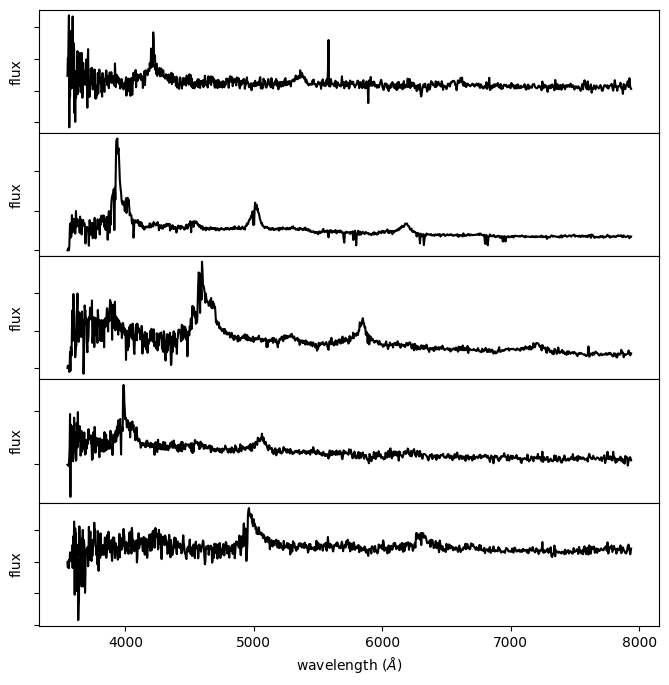

In [18]:
# Plot several spectra
fig = plt.figure(figsize=(8, 8))

fig.subplots_adjust(hspace=0)

for i in range(5):
    ax = fig.add_subplot(511 + i)
    ax.plot(lam, spectra[i], '-k')

    if i < 4:
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax.set_xlabel(r'wavelength $(\AA)$')

    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_ylabel('flux')

plt.show()

In [117]:
data['evecs']

array([[-0.00346868, -0.00746803, -0.00063906, ..., -0.01085812,
         0.00135265, -0.01515457],
       [-0.02206116, -0.0474974 , -0.04226653, ..., -0.02358916,
         0.00959544,  0.0074516 ],
       [-0.03433908, -0.0739316 , -0.06909985, ..., -0.00975014,
         0.00138189,  0.01268748],
       ...,
       [-0.01066644, -0.0229647 , -0.02554577, ..., -0.00505106,
         0.01962137, -0.01922807],
       [-0.00201472, -0.00433766, -0.00619813, ...,  0.06747066,
         0.0336092 ,  0.04133754],
       [ 0.1140417 ,  0.06870133, -0.07550719, ...,  0.01642522,
        -0.02183082,  0.00348014]])